In [184]:
from sklearn.decomposition import PCA
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, Dropout
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.inspection import permutation_importance


In [185]:
data_train = pd.read_excel("01train.xlsx")
data_train.head() # Show data (看看是否讀取成功)



,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [186]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','上網頻率指標','通話頻率指標','內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 1.5

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized


def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 


In [187]:
data_train=outlier_del(data_train,name_list_outlier)
data_train.describe()

y_data = data_train['Underclocking'].to_numpy()
#['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','外型平均曲率','上網頻率指標','通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']
feature_ex =['手機背蓋溫度(平均)','平均APP運作指標/小時','手機電池電量','手機外殼/包膜指標','手機電池電量','CPU跑分階級','內容容量比率']
x_data = data_train[feature_ex].to_numpy()




x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 

手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3783,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3783,)
Shape Of The After Ouliers:  (3528,)
上網頻率指標
Shape Of The Before Ouliers:  (3528,)
Shape Of The After Ouliers:  (3509,)
通話頻率指標
Shape Of The Before Ouliers:  (3509,)
Shape Of The After Ouliers:  (3501,)
內容容量比率
Shape Of The Before Ouliers:  (3501,)
Shape Of The After Ouliers:  (3285,)
[[-0.74989887 -0.77101126 -0.98034371 ... -0.98034371 -0.4019907
   0.87524065]
 [ 0.45124645 -1.12128822  1.15472364 ...  1.15472364  1.2590652
   0.46145452]
 [-1.28020019  0.75516671 -0.43657523 ... -0.43657523 -0.4019907
   0.88162933]
 ...
 [-1.27384861 -0.23214303 -1.57324943 ... -1.57324943 -0.4019907
   0.56075538]
 [-0.87778362 -1.05696193 -1.56047129 ... -1.56047129 -0.4019907
  -0.0518147 ]
 [ 

In [188]:
#PCA
pca=PCA(n_components=4)
x_data_pca=pca.fit(x_data).transform(x_data)


In [189]:
pca.n_components_

4

In [190]:
pca.explained_variance_ratio_

array([0.31513808, 0.22399776, 0.17142132, 0.11588293])

In [191]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31513808, 0.53913584, 0.71055716, 0.82644008])

In [192]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data_pca, y_data, test_size=0.1, random_state=42)

In [193]:
print(x_data_pca)

[[ 1.24193234 -0.30507639 -0.10174516 -0.15050747]
 [-1.63232885  1.01961681  0.25107923  1.2032641 ]
 [ 0.8248836  -0.20459355 -1.4543423  -0.45955542]
 ...
 [ 1.98124765 -0.32803607 -0.36859271 -1.01277572]
 [ 2.48327857  0.48633195  0.55567938 -0.13033499]
 [-0.75246238  0.08893682  1.49004055 -0.49588274]]


In [194]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate= 0.6,
                             max_depth=3,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.6667794316644113
測試集:  0.662613981762918


In [195]:
data_test = pd.read_excel("01test.xlsx")
test_id = data_test.pop('id')  
data_test=data_test[feature_ex]
# 假设 data_normalized 和 data_standardized 已正确定义
data_test = data_normalized(data_test)
data_test = data_standardized(data_test)
pca=PCA(n_components=4)
data_test =pca.fit(data_test ).transform(data_test )
# 使用xgboost模型进行预测
predicted_ans = xgboostModel.predict(data_test ) 

my_submission = pd.DataFrame({'id': test_id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)


In [196]:
l2_regularizer = tf.keras.regularizers.l2(0.01)
input_features = trainX.shape[1]
print( trainX.shape[1])
model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_features,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(trainX, trainY, batch_size=32, epochs=100,validation_split=0.1 ) #default batch=32
print(history.history.keys())

results = model.evaluate(testX, testY)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

4


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,113 (12.16 KB)

 Trainable params: 3,113 (12.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5685 - loss: 0.6750 - val_accuracy: 0.5845 - val_loss: 0.6781
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.5589 - loss: 0.6777 - val_accuracy: 0.5845 - val_loss: 0.6777
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.5805 - loss: 0.6761 - val_accuracy: 0.6351 - val_loss: 0.6550
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5821 - loss: 0.6836 - val_accuracy: 0.5845 - val_loss: 0.6791
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.5787 - loss: 0.6844 - val_accuracy: 0.5845 - val_loss: 0.6826
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.5691 - loss: 0.6850 - val_accuracy: 0.5845 - val_loss: 0.6812
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5806 - loss: 0.6831 - val_accuracy: 0.5845 - val_loss: 0.6841
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5805 - loss: 0.6824 - val_accura

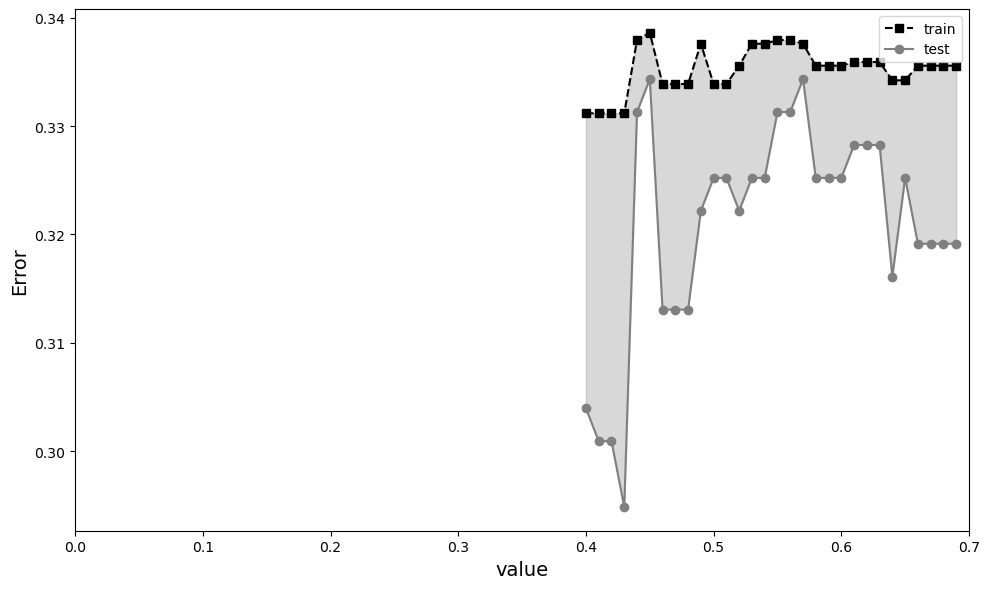

In [168]:
def xgboostModel_fun(n=10000, lr=0.01, maxdepth=3, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 0.7
divisors = np.arange(0.4, change, 0.01)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(lr=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()

In [182]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
import numpy as np

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate=0.01,
                             max_depth=3,
                             gamma=10,
                             random_state=42)  # 确保结果可复现

# 准备数据
# 假设 x_data 和 y_data 已经被定义并准备好了
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10折交叉验证

scores = []

for train_index, test_index in kf.split(x_data):
    # 根据索引分割训练集和测试集
    X_train, X_test = x_data[train_index], x_data[test_index]
    Y_train, Y_test = y_data[train_index], y_data[test_index]

    # 使用训练数据训练模型
    xgboostModel.fit(X_train, Y_train)
    
    # 计算每一折的准确率
    train_score = xgboostModel.score(X_train, Y_train)
    test_score = xgboostModel.score(X_test, Y_test)
    scores.append((train_score, test_score))

# 打印每折的训练和测试准确率以及平均准确率
train_scores = [score[0] for score in scores]
test_scores = [score[1] for score in scores]

print("训练集每折准确率:", train_scores)
print("测试集每折准确率:", test_scores)
print("平均训练集准确率:", np.mean(train_scores))
print("平均测试集准确率:", np.mean(test_scores))


训练集每折准确率: [0.6951962110960758, 0.6968876860622463, 0.6894451962110961, 0.6911366711772666, 0.6985791610284168, 0.7034156239431857, 0.6942847480554616, 0.7013865404125803, 0.6980047345282381, 0.7007101792357119]
测试集每折准确率: [0.6960486322188449, 0.6595744680851063, 0.662613981762918, 0.6778115501519757, 0.723404255319149, 0.6615853658536586, 0.6646341463414634, 0.6890243902439024, 0.6829268292682927, 0.6585365853658537]
平均训练集准确率: 0.6969046751750279
平均测试集准确率: 0.6776160204611164
